In [1]:
# required import 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize

In [2]:
# Load Data and Preview

df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Null Check

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

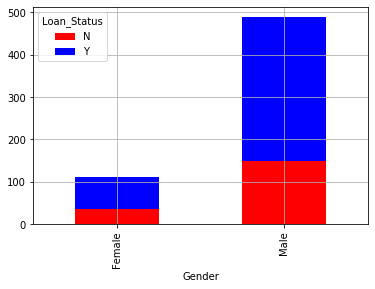

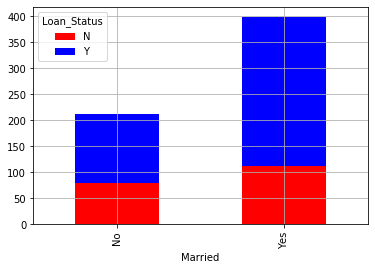

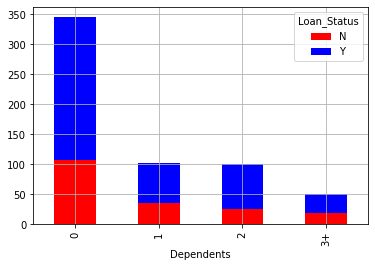

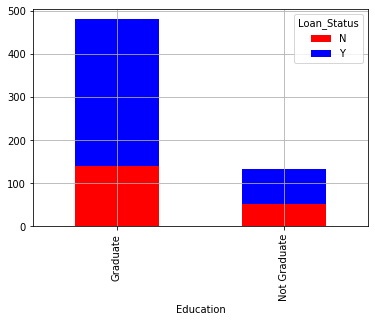

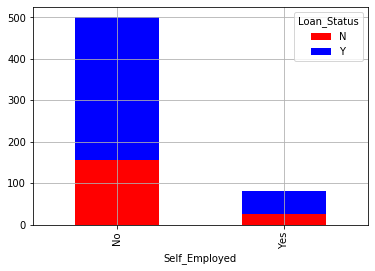

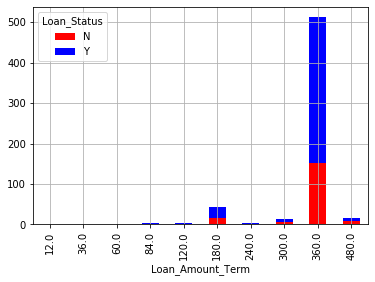

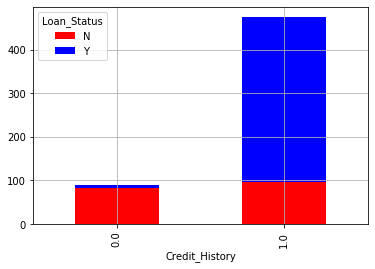

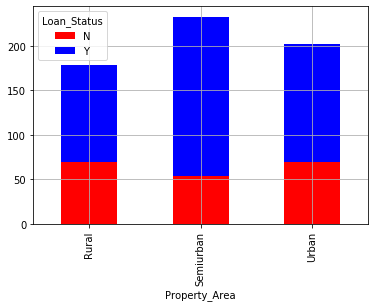

In [4]:
# Data Visualize 

columns = df.columns.tolist()
[columns.remove(x) for x in ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Status']]

for col in columns:
    temp = pd.crosstab(df[col], df['Loan_Status'])
    temp.plot(kind='bar', color=['red','blue'], stacked=True, grid=True)
plt.show()

In [5]:
# Impute missing data

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)

In [6]:
# Convert string columns to Categorial

string_type_columns = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in string_type_columns:
    df[i] = le.fit_transform(df[i])

In [7]:
# Remove unimportant columns, separate target from features

X = df.drop(labels=['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [8]:
# Fit a Random Forest Classifier

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

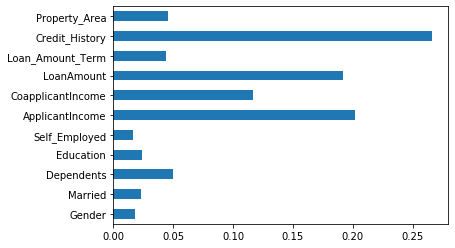

In [9]:
# Visualize important features

imp_features = pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')
plt.show()

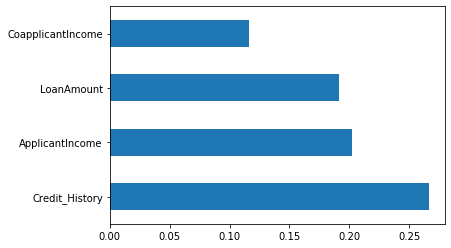

In [10]:
# Top 4 important features

imp_features = pd.Series(model.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh')
plt.show()

In [11]:
# Train-test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
# Train Logistic Regression and view score

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.8021739130434783

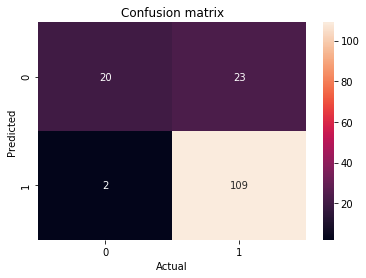

In [13]:
# Confision Matrix for Test Data

y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [14]:
# Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8376623376623377
Precision: 0.8257575757575758
Recall: 0.9819819819819819


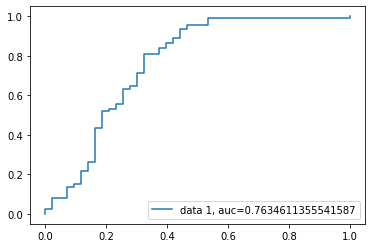

In [15]:
# ROC curve for predicted Probabilities

y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=0)
plt.show()

In [16]:
# Train Random Forest Classifier and view score

model = RandomForestClassifier(max_depth=3,)
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.808695652173913

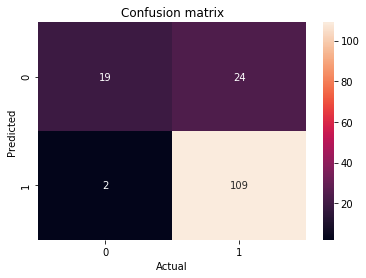

In [17]:
# Confision Matrix for Test Data

y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [18]:
# Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8311688311688312
Precision: 0.8195488721804511
Recall: 0.9819819819819819
